# Description

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

# Goal
It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

# Metric
Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

# Project-2

The project is an supervised regression problem.

Several approaches used for processing dataset:

outlier handling: Z-score and IQR Score
Feature scaling: MinMaxScaler and StandardScaler
Feature dimension reduction: PCA
Gaussian LinearRegression
Models used to fit dataset: 
    RandomForestRegressor, 
    SVR, 
    KNeighborsRegressor, 
    Polynomial Regression, 
    Gaussian LinearRegression, 
    Gaussian LinearRegression with Ridge, 
    Gaussian LinearRegression with Lasso

Performance is measured by using using score provided by the model if it is provided and
mean_squared_error (RMSE/MSE)

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)

# load datasets
load training dataset, test dataset and test labels

In [2]:
import pandas as pd
train_df = pd.read_csv("./house-prices/train.csv")
train_df.shape

(1460, 81)

In [3]:
test_df = pd.read_csv("./house-prices/test.csv")
test_df.shape

(1459, 80)

In [4]:
tstlabel_df = pd.read_csv("./house-prices/sample_submission.csv")
tstlabel_df.shape

(1459, 2)

train_df.head()

test_df.head()

tstlabel_df.head()

In [5]:
test_merged=pd.merge(test_df, tstlabel_df, on='Id')


#train_df.head()
test_merged.shape
test_merged.head()

train_df.head()

In [6]:

df=pd.concat([train_df, test_merged],ignore_index=True)
df.shape

(2919, 81)

In [7]:
data=df.copy()
data.shape

(2919, 81)

# Exploratory Data Analysis(EDA)

### check outliers

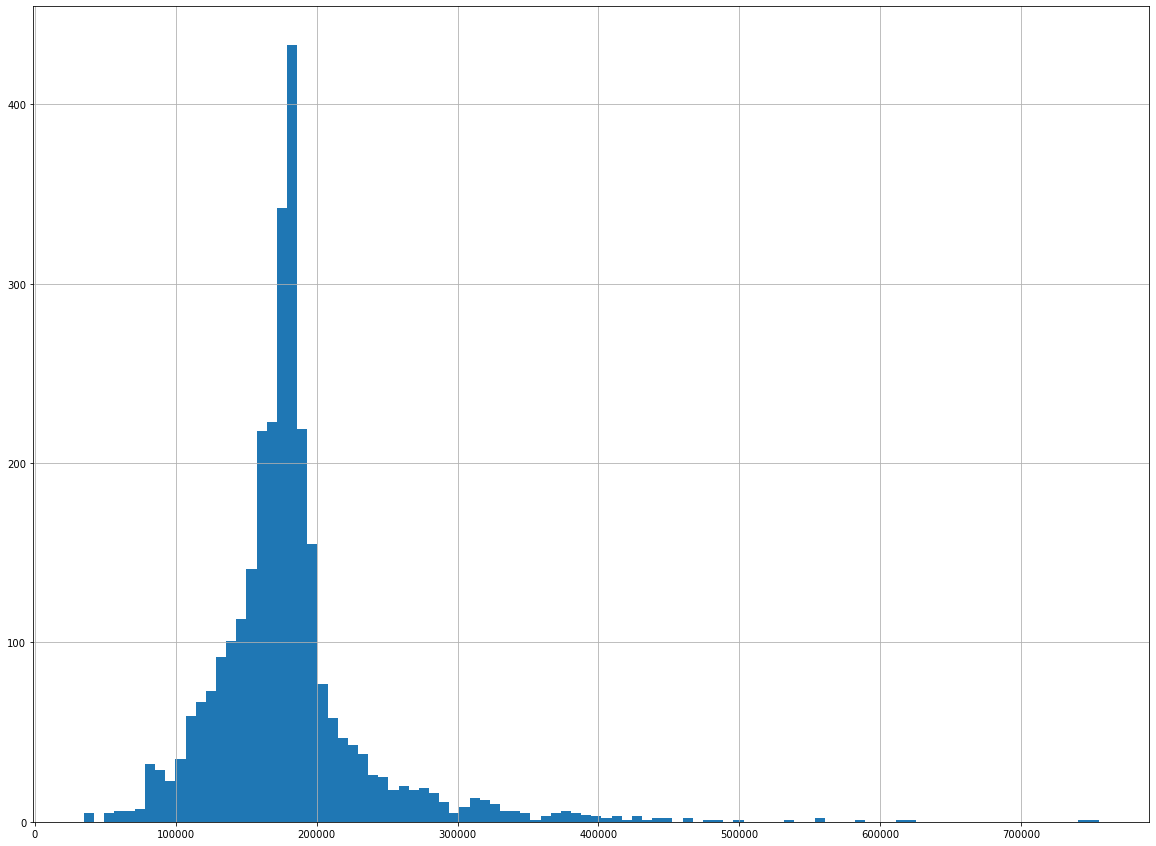

In [8]:
#see data distribution
import matplotlib.pyplot as plt

data['SalePrice'].hist(bins=100, figsize=(20,15))
plt.show()

In [9]:
data['SalePrice'].describe()
#pd.unique(df['SalePrice'])

count      2919.000000
mean     180052.854647
std       57381.565721
min       34900.000000
25%      154795.084126
50%      176734.841494
75%      191895.744157
max      755000.000000
Name: SalePrice, dtype: float64

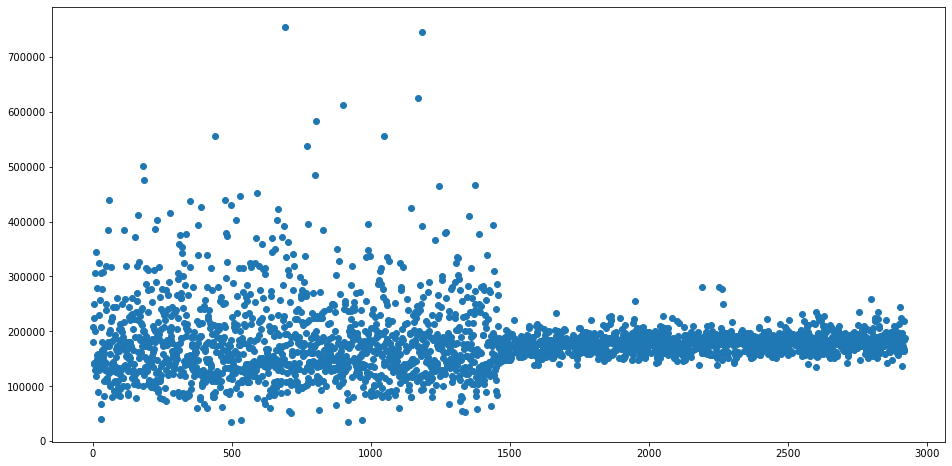

In [10]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data['Id'],data['SalePrice'])

plt.show()

<AxesSubplot:xlabel='SalePrice'>

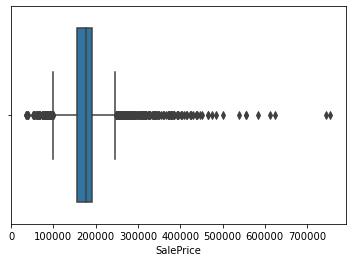

In [11]:
import seaborn as sns
sns.boxplot(x=data['SalePrice'])

In [12]:
data.shape

(2919, 81)

### remove outliers

In [13]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['SalePrice']))

#print(z)

In [14]:
threshold = 3
#print(np.where(z > 3))
outliers=np.where(z > 3)
#type(outliers[0])
outliers[0].shape

(54,)

In [15]:
#drop outliers
print(data.shape)
idx = data.index[outliers[0]]
data.drop(idx,inplace=True)
#type(data)
data.shape

(2919, 81)


(2865, 81)

<AxesSubplot:xlabel='SalePrice'>

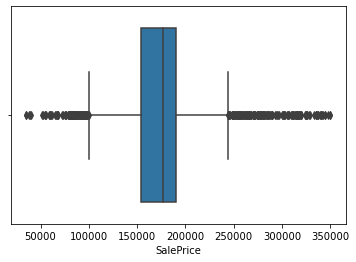

In [16]:
#check data distribution

import seaborn as sns
sns.boxplot(x=data['SalePrice'])

In [17]:
data['SalePrice'].describe()

count      2865.000000
mean     175222.590128
std       44076.774395
min       34900.000000
25%      154000.000000
50%      176363.773908
75%      190000.000000
max      350000.000000
Name: SalePrice, dtype: float64

In [18]:
#do Z-score reduction again

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data['SalePrice']))
#z = (stats.zscore(data['SalePrice']))
print(z)

[0.75511921 0.14244476 1.0954939  ... 0.99842865 0.22014731 0.28408299]


In [19]:
threshold = 3
#print(np.where(z > 3))
outliers=np.where(z > 3)
#type(outliers[0])
outliers[0].shape

(57,)

In [20]:
#drop outliers
print(data.shape)
idx = data.index[outliers[0]]
data.drop(idx,inplace=True)

data.shape

(2865, 81)


(2808, 81)

In [21]:
data['SalePrice'].describe()

count      2808.000000
mean     172680.530170
std       38983.808591
min       52000.000000
25%      153500.000000
50%      175959.629675
75%      189000.000000
max      307000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:xlabel='SalePrice'>

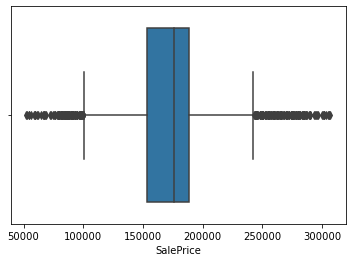

In [22]:
import seaborn as sns
sns.boxplot(x=data['SalePrice'])

### Examine features 



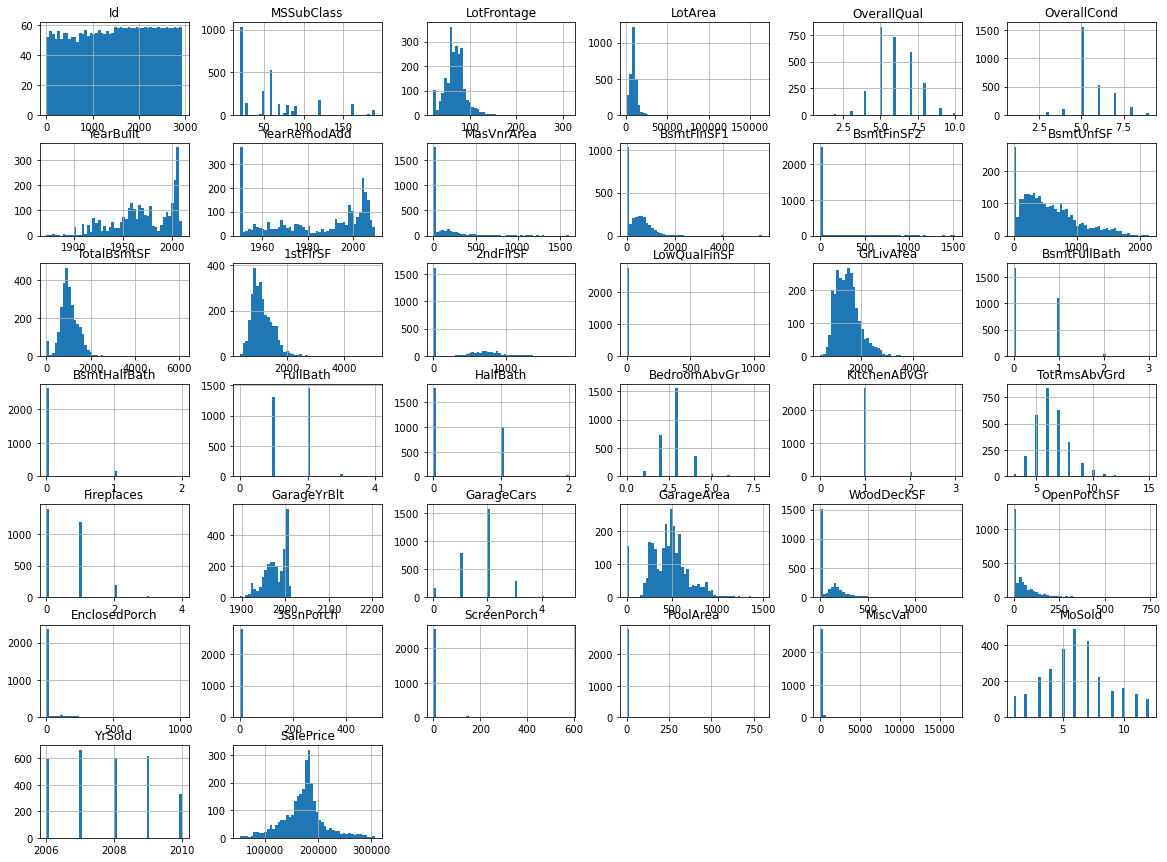

In [23]:
#see data distribution
import matplotlib.pyplot as plt

data.hist(bins=50, figsize=(20,15))
plt.show()

In [24]:
data.info(verbose=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2808 non-null   int64  
 1   MSSubClass     2808 non-null   int64  
 2   MSZoning       2804 non-null   object 
 3   LotFrontage    2329 non-null   float64
 4   LotArea        2808 non-null   int64  
 5   Street         2808 non-null   object 
 6   Alley          197 non-null    object 
 7   LotShape       2808 non-null   object 
 8   LandContour    2808 non-null   object 
 9   Utilities      2806 non-null   object 
 10  LotConfig      2808 non-null   object 
 11  LandSlope      2808 non-null   object 
 12  Neighborhood   2808 non-null   object 
 13  Condition1     2808 non-null   object 
 14  Condition2     2808 non-null   object 
 15  BldgType       2808 non-null   object 
 16  HouseStyle     2808 non-null   object 
 17  OverallQual    2808 non-null   int64  
 18  OverallC

In [25]:
#for debugging
dataBK=data.copy()
data.shape


(2808, 81)

# Trial-a 
data wrangling / preprocess data: replaced strings by proper values

In [26]:
#drop Id
print(data.shape)
data.drop(['Id'], axis=1, inplace=True)
print(data.shape)

(2808, 81)
(2808, 80)


In [27]:
#get features with object type
data_obj=data.select_dtypes(include='object')

In [28]:
#check unique values of each column with dtype object
for elm in data_obj:
    #print(elm) 
    col = elm
    #print(col)
    #print(col, len(pd.unique(data_obj[col])) )
    print(col, len(pd.unique(data_obj[col])), pd.unique(data_obj[col]))

MSZoning 6 ['RL' 'RM' 'FV' 'C (all)' 'RH' nan]
Street 2 ['Pave' 'Grvl']
Alley 3 [nan 'Grvl' 'Pave']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 4 ['Lvl' 'Bnk' 'HLS' 'Low']
Utilities 3 ['AllPub' 'NoSeWa' nan]
LotConfig 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV'
 'NridgHt' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'RRAn' 'RRAe' 'PosA']
BldgType 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 8 ['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll'
 'Cly

In [29]:
data.shape

(2808, 80)

# replace strings with proper values

In [30]:
data['ExterQual']= data['ExterQual'].replace(['Fa', 'TA', 'Gd', 'Ex'],[6,8,10,12])
data['ExterCond']= data['ExterCond'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'],[4,6,8,10,12])

data['HeatingQC']= data['HeatingQC'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'],[4,6,8,10,12])

data['GarageQual']= data['GarageQual'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])
data['GarageCond']= data['GarageCond'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])

data['PoolQC']= data['PoolQC'].replace([np.nan, 'Fa', 'Gd', 'Ex'],[2,6,10,12])

data['BsmtExposure']= data['BsmtExposure'].replace([np.nan, 'No', 'Mn', 'Av','Gd'],[2,4,6,8,10])
data['KitchenQual']= data['KitchenQual'].replace([np.nan, 'Fa', 'TA','Gd', 'Ex'],[2,6, 8,10,12])
data['FireplaceQu']= data['FireplaceQu'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])

data['Functional']= data['Functional'].replace(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', np.nan],[8,7,6,5,4,3,2,1])

data['BsmtFinType2']=data['BsmtFinType2'].replace([np.nan,'Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7])
data['BsmtFinType1']=data['BsmtFinType1'].replace([np.nan,'Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7])

data['BsmtQual']= data['BsmtQual'].replace([np.nan,'Fa', 'TA', 'Gd', 'Ex'],[2,6,8,10,12])
data['BsmtCond']= data['BsmtCond'].replace([np.nan, 'Po','Fa', 'TA', 'Gd'],[2,4,6,8,10])

In [31]:
#Replace NaN with value according to the description in data_description.txt

data['MiscFeature']=data['MiscFeature'].fillna(value='No') #no Miscellaneous feature
data['SaleType']=data['SaleType'].fillna(value='Oth') #other
data['Fence']=data['Fence'].fillna(value='No') #no fence

data['GarageFinish']=data['GarageFinish'].fillna(value='No')#no garage
data['GarageType']=data['GarageType'].fillna(value='No')#no garage

data['SaleType']=data['SaleType'].fillna(value='Oth')
data['Electrical']=data['Electrical'].fillna(value='Oth')#other

data['Alley']=data['Alley'].fillna(value='None')
data['Utilities']=data['Utilities'].fillna(value='None')
data['MasVnrType']=data['MasVnrType'].fillna(value='None')
data['Exterior1st']=data['Exterior1st'].fillna(value='Other')
data['Exterior2nd']=data['Exterior2nd'].fillna(value='Other')

data['MiscFeature']=data['MiscFeature'].fillna(value='No') #No alley access



data.isnull().sum().sum()

In [32]:
#process feature MSZoning values
#data[data['MSZoning'].isnull()].count(axis=1)
#data[data['MSZoning'].isnull()]

#replace Nan in feature MSZoning with mode value in its Neighorhood
#find mode value in the Neighborhood 'IDOTRR' and 'Mitchel'
#data['Neighborhood']=='IDOTRR'['MSZoning','Neighborhood','Utilities']]
#X=data.loc[data['Neighborhood'] == 'IDOTRR']

#X['MSZoning'].value_counts(dropna=False)
#data.loc[data['Neighborhood'] == 'Mitchel']['MSZoning'].value_counts(dropna=False)

#data.loc[1915]['Neighborhood']
#data.loc[1915,'MSZoning']='RM'
#data.loc[1915,:]

data.loc[[1915, 2216,2250],'MSZoning']='RM'
data.loc[2904,'MSZoning']='RL'

In [33]:
#set 0 to LotFrontage and MasVnrArea
data['LotFrontage'].value_counts(dropna=False)
data['LotFrontage'].isnull()
data['LotFrontage']=data['LotFrontage'].fillna(0)
data['MasVnrArea']=data['MasVnrArea'].fillna(0)
#data.isnull().sum().sum()

In [34]:
#remove record 2120
#print(data[data['MasVnrArea'].isnull()][['MasVnrArea','MasVnrType']])
#print(data[data['BsmtFinSF2'].isnull()][['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF']])
data.dropna(subset=['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF'], how='all', inplace=True)

In [35]:
data.isnull().sum().sum()

160

In [36]:
#replace GarageYrBlt with YearBUilt as they are corelated

#df.Col1 = df.Col1.fillna(df.Col2) #fill in missing values if indices match

data.GarageYrBlt = data.GarageYrBlt.fillna(df.YearBuilt) #fill in missing values if indices match


In [37]:
#replace 0 to BsmtFullBath and BsmtHalfBath of data[2188] as BsmtFinSF1 is 0 and BsmtFinSF2 is 0
data['BsmtFullBath'] =data['BsmtFullBath'].fillna(0)
data['BsmtHalfBath'] =data['BsmtHalfBath'].fillna(0)
                        

In [38]:
data.isnull().sum().sum()

2

In [39]:
#replace10 GarageCars and GarageArea to 0 as garage is detached and no other information
data['GarageCars'] =data['GarageCars'].fillna(0)
data['GarageArea'] =data['GarageArea'].fillna(0)

In [40]:
data.isnull().sum().sum()

0

In [41]:
#completed hanlding NaN
data.shape

(2807, 80)

In [42]:
#Split features and labels

features = data.drop('SalePrice', 1)
labels = data['SalePrice'].values #convert to numpy array
print(features.shape)
print(labels.shape)

(2807, 79)
(2807,)


In [43]:
##features_st for standardScaling and features_mm for MinMaxScaling
features_st = features.copy()
features_mm = features.copy()

#### feature scaling

In [44]:
# scale labels using StandardScaler and MinMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

y=labels.reshape(-1,1)
mm_scaler = MinMaxScaler()
mm_scaler.fit(y)

st_scaler = StandardScaler()
st_scaler.fit(y)

y_mm = pd.DataFrame(mm_scaler.transform(y))
y_st = pd.DataFrame(st_scaler.transform(y))

In [45]:
#need to change to 1d array for label
import numpy as np

print(y_mm.shape)
y_mm = np.ravel(y_mm)
print(y_mm.shape)
labels_mm = y_mm

(2807, 1)
(2807,)


In [46]:
#scale features using MinMaxScaler

from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


# determine categorical and numerical features
X = features_mm

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
ct = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=ct)

# define the data preparation and modeling pipeline
#pipeline = Pipeline(steps=[('prep',col_transform)])
features_mm = col_transform.fit_transform(features_mm)

In [47]:
#scake features using StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler

#features_st = features.copy()

# determine categorical and numerical features
X = features_st

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
ct = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=ct)

# define the data preparation and modeling pipeline
#pipeline = Pipeline(steps=[('prep',col_transform)])
features_st = col_transform.fit_transform(X)


## Trial-a: Models 


### Trial-a-1 with PCA

### Trial-a-1-1: 
model: RandomForestRegressor; 
feature scaling: MinmaxScaler;
PCA: n_components = 0.99;
labels: without normalization

#### reduce features by using PCA

In [48]:
features_mm.shape

(2807, 243)

In [49]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(features_mm)
reducedf_mm = pca.transform(features_mm)


In [50]:
print(pca.n_components_ )

142


In [51]:
X=pca.explained_variance_ratio_
X.sum()

0.9902591233355654

In [52]:
print(y_mm.shape)

(2807,)


In [53]:
features_mm.shape
labels_mm.shape
reducedf_mm.shape

(2807, 142)

#### Model: RandomForestRegressor

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Xtrain, Xtest, ytrain, ytest = train_test_split(reducedf_mm, labels,
                                                #test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

ytest = ytest.reshape(-1,1)
ypred = ypred.reshape(-1,1)

#print(model.base_estimator_)
#print(model.estimators_)
#print(model.n_outputs_)
#print(model.n_features_)
#print(model.feature_importances_)
model.score(Xtest,ytest)

0.3802344092499442

In [55]:
from sklearn.metrics import mean_squared_error 
from math import sqrt

print(mean_squared_error(ytest, ypred, squared=True)) #MSE
print(mean_squared_error(ytest, ypred, squared=False)) #RMSE (default)
print(sqrt(mean_squared_error(ytest, ypred)))

937863465.1377068
30624.556570466564
30624.556570466564


In [56]:
ypred = model.predict(Xtest[0:5,:])
ypred

array([182204.12476073, 148922.04501651, 154421.43361707, 176835.34270222,
       175083.60969655])

In [57]:
ytest[0:5]

array([[184900.],
       [109500.],
       [136500.],
       [192000.],
       [155000.]])

### Trial-a-1-2 
model: KNeighborsRegressor;
feature scaling: MinmaxScaler and StandardScaler;
PCA: n_components = 0.99
labels: without normalization

In [58]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

#### PCA reduce the normalizated features

In [59]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(features_mm)
reducedf_mm = pca.transform(features_mm)

#### KNN with normalizated data

In [60]:
from sklearn.model_selection import train_test_split
X=reducedf_mm 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

print(Xtrain.shape, Xtest.shape)
K_range = range(1, 21)
rmse_val_mm = [] #to store rmse values for different k
for K in K_range:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrain, ytrain)  #fit the model
    ypred = model.predict(Xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest, ypred)) #calculate rmse
    rmse_val_mm.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

(1964, 142) (843, 142)


In [61]:
print(Xtrain.shape, Xtest.shape)

(1964, 142) (843, 142)


#### PCA reduce standardized features

In [62]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(features_st)
reducedf_st = pca.transform(features_st)

#### KNN with standardized data

In [63]:
from sklearn.model_selection import train_test_split
X=reducedf_st 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

print(Xtrain.shape, Xtest.shape)
K_range = range(1, 21)
rmse_val_st = [] #to store rmse values for different k
for K in K_range:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrain, ytrain)  #fit the model
    ypred = model.predict(Xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest, ypred)) #calculate rmse
    rmse_val_st.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

(1964, 109) (843, 109)


#### plot the performance
Standardized data get better RMSE in this case

Text(0, 0.5, 'RMSE')

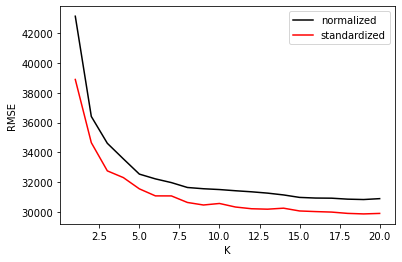

In [64]:
#plotting the rmse values against k values
#plt.plot(K_range, rmse_val, label='raw')
plt.plot(K_range, rmse_val_mm, label='normalized', color='k')
plt.plot(K_range, rmse_val_st, label='standardized', color='r')
plt.legend()
plt.xlabel('K')
plt.ylabel('RMSE')

#### grid search the best K using standardized data

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,15,17,20]}

X=reducedf_st 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

knn = neighbors.KNeighborsRegressor()

grid = GridSearchCV(knn, params, cv=5)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)

{'n_neighbors': 20}
0.4163361440000212
KNeighborsRegressor(n_neighbors=20)


#### Evaludate test data with the found best estimator KNN with n_neighbors

In [66]:
#from sklearn.model_selection import cross_val_score
X=reducedf_st 
y=labels
model=grid.best_estimator_

X=reducedf_st 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)
ypred = model.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error


29912.53031288596

### Trial -a-1-3
model: SVR
features: normalized with StandardScaler;
PCA: n_components = 0.99
labels: without normalization

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X=reducedf_st 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

regr = SVR()
ypred = regr.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error

36904.422429568265

In [68]:
model.get_params().keys()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 20,
 'p': 2,
 'weights': 'uniform'}

#use grid search for find C and gamma of SVR
model: SVR
features: normalized with StandardScaler
PCA: yes
labels: without normalization

In [69]:
from sklearn.svm import SVR
#from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = PCA(n_components=0.99, whiten=True, svd_solver='randomized', random_state=42)
svr = SVR(kernel='rbf')
#model = make_pipeline(pca, svr)
model = make_pipeline(svr)

In [70]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svr__C': [1, 5, 10, 50],
              'svr__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

X=reducedf_st 
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 28.1 s, sys: 0 ns, total: 28.1 s
Wall time: 28.1 s
{'svr__C': 50, 'svr__gamma': 0.005}


In [71]:
#regr = SVR(C=50, gamma=0.005 )
regr = grid.best_estimator_
ypred = regr.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error

35645.77798191928

In [72]:
regr.score(Xtest, ytest)

0.05807827538802712

# test Summary:
#with PCS rsme=0.059, score=0.343
#without PCS rsme=0.029, score=0.84


### Trail-a-2: without PCA


### Trail-a-2-1
model: RandomForestRegressor
feature scaling: MinmaxScaler
PCA: No
labels: without normalization

#### RandomForestRegressor

In [73]:
#without PCA, label without MinMaxScaling

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Xtrain, Xtest, ytrain, ytest = train_test_split(features_mm, labels,
                                                #test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

print("score: ", model.score(Xtest, ytest))

from sklearn.metrics import mean_squared_error 
from math import sqrt
sqrt(mean_squared_error(ytest,ypred))

score:  0.4955544598518207


27628.876306179274

#### check performance

In [74]:
from sklearn.metrics import mean_squared_error 
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))#MSE

27628.876306179274

In [75]:
from sklearn.metrics import mean_squared_error
mean_squared_error(ytest, ypred,squared=False) #RMSE
#mean_squared_error(ytest, ypred,squared=True) #MSE (default)

27628.876306179274

#### Trail-a-2-2: 
model:KNN regresssion; 
feature scaling: MinmaxScaler;
PCA: No;
labels: without normalization

In [76]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt

In [77]:
K_range = range(1, 21)

In [78]:
from sklearn.model_selection import train_test_split
X=features_mm
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.30,
                                                random_state=0)
print(Xtrain.shape, Xtest.shape)
rmse_val_mm = [] #to store rmse values for different k
for K in K_range:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrain, ytrain)  #fit the model
    pred = model.predict(Xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest, pred)) #calculate rmse
    rmse_val_mm.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)

(1964, 243) (843, 243)


In [79]:
from sklearn.model_selection import train_test_split
X=reducedf_st
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)

print(Xtrain.shape, Xtest.shape)
#K_range = range(1, 21)
rmse_val_st = [] #to store rmse values for different k
for K in K_range:
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(Xtrain, ytrain)  #fit the model
    ypred = model.predict(Xtest) #make prediction on test set
    error = sqrt(mean_squared_error(ytest, ypred)) #calculate rmse
    rmse_val_st.append(error) #store rmse values
    #print('RMSE value for k= ' , K , 'is:', error)


(1964, 109) (843, 109)


Text(0, 0.5, 'RMSE')

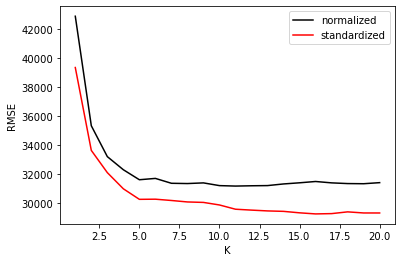

In [80]:
plt.plot(K_range, rmse_val_mm, label='normalized', color='k')
plt.plot(K_range, rmse_val_st, label='standardized', color='r')
plt.legend()
plt.xlabel('K')
plt.ylabel('RMSE')


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,15,17,20]}

X=features_st
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)

knn = neighbors.KNeighborsRegressor()

grid = GridSearchCV(knn, params, cv=5)
grid.fit(Xtrain, ytrain)
grid.best_params_



{'n_neighbors': 17}

In [82]:
grid.best_estimator_

KNeighborsRegressor(n_neighbors=17)

In [83]:
#from sklearn.model_selection import cross_val_score
X=reducedf_st
y=labels
model=grid.best_estimator_

X=reducedf_st
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)
ypred = model.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error
#cross_val_score(model, X, y, cv=5)


29286.551815714673

#### Trial -a-2-3
model: SVR
features: normalized with StandardScaler;
PCA: No;
labels: without normalization


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR


X=features_st
y=labels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)

regr = SVR()
ypred = regr.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error


39199.99038099362

In [85]:
from sklearn.svm import SVR
#from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

#pca = PCA(n_components=150, whiten=True, svd_solver='randomized', random_state=42)
svr = SVR(kernel='rbf')
#model = make_pipeline(pca, svr)
model = make_pipeline(svr)



from sklearn.model_selection import GridSearchCV
param_grid = {'svr__C': [1, 5, 10, 50],
              'svr__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

get_ipython().run_line_magic('time', 'grid.fit(Xtrain, ytrain)')
print(grid.best_params_)


CPU times: user 53.7 s, sys: 16 ms, total: 53.7 s
Wall time: 53.7 s
{'svr__C': 50, 'svr__gamma': 0.005}


In [86]:
print(grid.best_params_)
grid.best_estimator_


{'svr__C': 50, 'svr__gamma': 0.005}


Pipeline(steps=[('svr', SVR(C=50, gamma=0.005))])

In [87]:
#regr = SVR(C=50, gamma=0.005 )
regr = grid.best_estimator_
ypred = regr.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error


37897.09810502169

# Trial-b
dataset: drop all NaN;
process outliers with IQR Score method

## Trial-b: preprocess data

In [88]:
tdata = df.copy()
tdata.shape

(2919, 81)

In [89]:
#drop any column has NaN
tdata=tdata.dropna(axis=1, how="any")
tdata.shape

(2919, 47)

In [90]:
tdata.isnull().sum().sum()

0

In [91]:
#drop Id
tdata.drop(['Id'], axis=1, inplace=True)
print(tdata.shape)

(2919, 46)


### process outliers with IQR Score method

<AxesSubplot:xlabel='SalePrice'>

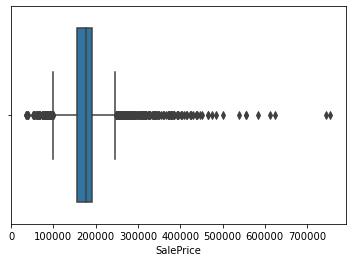

In [92]:
import seaborn as sns
sns.boxplot(x=tdata['SalePrice'])

In [93]:
X=tdata['SalePrice']

Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 -Q1
print(IQR)

#display((X < (Q1 - 1.5 * IQR)) | (X > (Q3 +1.5 *IQR)))
mask = ((X < (Q1 - 1.5 * IQR)) | (X > (Q3 +1.5 *IQR)))
Y=tdata[mask]
#D = tdata[~((X< (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)]
Y.index
Y.shape

37100.66003098502


(348, 46)

tdata.shape
tdata.head()

In [94]:
# drop outliers
print(tdata.shape)
tdata=tdata.drop(Y.index)
tdata.shape

(2919, 46)


(2571, 46)

<AxesSubplot:xlabel='SalePrice'>

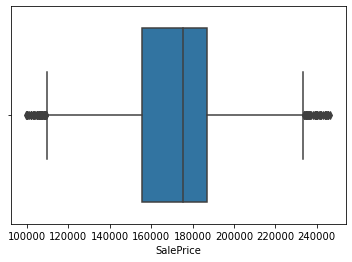

In [95]:
import seaborn as sns
sns.boxplot(x=tdata['SalePrice'])

In [96]:
#split features and labels
tfeatures = tdata.drop('SalePrice', 1)
tlabels = tdata['SalePrice'].values #convert to numpy array

In [97]:
#features_st for standardScaling and features_mm for MinMaxScaling
tfeatures_st = tfeatures.copy()
tfeatures_mm = tfeatures.copy()

### scale features

In [98]:
# scale labels with StandardScaler and MinMaxScaler

from sklearn.preprocessing import StandardScaler, MinMaxScaler

y=tlabels.reshape(-1,1)

mm_scaler = MinMaxScaler()
mm_scaler.fit(y)

st_scaler = StandardScaler()
st_scaler.fit(y)

ty_mm = pd.DataFrame(mm_scaler.transform(y))
ty_st = pd.DataFrame(st_scaler.transform(y))

In [99]:
#scale features with MinMaxScaler

from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler


# determine categorical and numerical features
X = tfeatures_mm

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
ct = [('cat', OneHotEncoder(), categorical_ix), ('num', MinMaxScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=ct)

# define the data preparation and modeling pipeline
#pipeline = Pipeline(steps=[('prep',col_transform)])
tfeatures_mm = col_transform.fit_transform(tfeatures_mm)
tfeatures_mm.shape

(2571, 148)

In [100]:
#scale features with StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler

#features_st = features.copy()

# determine categorical and numerical features
X = tfeatures_st

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
ct = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=ct)

# define the data preparation and modeling pipeline
#pipeline = Pipeline(steps=[('prep',col_transform)])
tfeatures_st = col_transform.fit_transform(X)
tfeatures_st.shape

(2571, 148)

In [101]:
#need to change to 1d array for label
import numpy as np

print(ty_mm.shape)
ty_mm = np.ravel(ty_mm)
print(ty_mm.shape)
tlabels_mm = ty_mm

(2571, 1)
(2571,)


## Trial-b: Models

### Trial-b-1
Model: RandomForestRegressor

### Trial-b-1-1
features: drop all NaN
feature scaling: StandardScaler
PCA: no
model: RandomForestRegressor

In [102]:
tfeatures_st.shape

(2571, 148)

In [103]:
#### RandomForestRegressor with StandardScaled data

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=tfeatures_st
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

#array.reshape(-1, 1)
#
ytest = ytest.reshape(-1,1)
ypred = ypred.reshape(-1,1)

print("score: ", model.score(Xtest, ytest))

from sklearn.metrics import mean_squared_error 
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))

score:  0.3794537360930499


21997.56269436541

In [105]:
#### RandomForestRegressor with MinMaxScaled data

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=tfeatures_mm
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

#array.reshape(-1, 1)
#
ytest = ytest.reshape(-1,1)
ypred = ypred.reshape(-1,1)

print("score: ", model.score(Xtest, ytest))

from sklearn.metrics import mean_squared_error 
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))

score:  0.3794701573057213


21997.271637061513

In [107]:
ypred = model.predict(Xtest[0:5,:])
ypred

array([197912.39793692, 184380.13910654, 168600.89313108, 155248.49097042,
       160071.98566916])

In [108]:
ytest[0:5]

array([[205000.        ],
       [178100.58962232],
       [145000.        ],
       [147400.        ],
       [178553.55853702]])

### Trial-b-1-2
features: drop all NaN
feature scaling: StandardScaler
PCA: yes
model: RandomForestRegressor

In [109]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(tfeatures_st)
treduced_st = pca.transform(tfeatures_st)


In [110]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=treduced_st
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

#array.reshape(-1, 1)
#
ytest = ytest.reshape(-1,1)
ypred = ypred.reshape(-1,1)

print("score: ", model.score(Xtest, ytest))

from sklearn.metrics import mean_squared_error 
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))

score:  0.39407018023613305


21736.951909894357

### Trial-b-2
model: KNN

#### Trial-b-2-1
features: drop all NaN
feature scaling: StandardScaler
PCA: yes
model: KNN

In [111]:
tfeatures_st.shape
#type(tfeatures_st)

(2571, 148)

In [112]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(tfeatures_st)
treducedf_st = pca.transform(tfeatures_st)
print(pca.n_components_ )

72


In [113]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import neighbors


params = {'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12,15,17,20]}

X=treducedf_st
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=2)

knn = neighbors.KNeighborsRegressor()

grid = GridSearchCV(knn, params, cv=5)
grid.fit(Xtrain, ytrain)

print(grid.best_params_)
print(grid.best_estimator_)
grid.best_score_

{'n_neighbors': 20}
KNeighborsRegressor(n_neighbors=20)


0.3473182921616669

In [114]:
model=grid.best_estimator_

X=treducedf_st
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)
ypred = model.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error


22262.33712439839

### Trial-b-3
Model:SVR

#### Trial-b-3-1
features: drop all NaN
feature scaling: StandardScaler
PCA: n_components=0.99
model: SVR

In [115]:
from sklearn.svm import SVR
#from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=0.99)
svr = SVR(kernel='rbf')
model = make_pipeline(pca, svr)

from sklearn.model_selection import GridSearchCV
param_grid = {'svr__C': [1, 5, 10, 50],
              'svr__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

#X=treducedf_st
X=tfeatures_st
y=tlabels
get_ipython().run_line_magic('time', 'grid.fit(X, y)')
print(grid.best_params_)

print(grid.best_params_)
grid.best_estimator_


CPU times: user 1min 44s, sys: 3.89 s, total: 1min 48s
Wall time: 37.6 s
{'svr__C': 50, 'svr__gamma': 0.005}
{'svr__C': 50, 'svr__gamma': 0.005}


Pipeline(steps=[('pca', PCA(n_components=0.99)),
                ('svr', SVR(C=50, gamma=0.005))])

In [116]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(tfeatures_st)
treducedf_st = pca.transform(tfeatures_st)
print(pca.n_components_ )

72


In [117]:
model=grid.best_estimator_

X=treducedf_st
y=tlabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state=0)
ypred = model.fit(Xtrain, ytrain).predict(Xtest)
error = sqrt(mean_squared_error(ytest, ypred))
error

27223.91156821662

In [118]:
model.score(Xtest, ytest)

0.049556975451479746

## Trial-c
dataset: drop all NaN;
process outliers with IQR Score method;
replace catogerical object with values

In [119]:
tdata.shape
Cdata = tdata.copy()
Cdata.shape

(2571, 46)

In [120]:
Cdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571 entries, 0 to 2918
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2571 non-null   int64  
 1   LotArea        2571 non-null   int64  
 2   Street         2571 non-null   object 
 3   LotShape       2571 non-null   object 
 4   LandContour    2571 non-null   object 
 5   LotConfig      2571 non-null   object 
 6   LandSlope      2571 non-null   object 
 7   Neighborhood   2571 non-null   object 
 8   Condition1     2571 non-null   object 
 9   Condition2     2571 non-null   object 
 10  BldgType       2571 non-null   object 
 11  HouseStyle     2571 non-null   object 
 12  OverallQual    2571 non-null   int64  
 13  OverallCond    2571 non-null   int64  
 14  YearBuilt      2571 non-null   int64  
 15  YearRemodAdd   2571 non-null   int64  
 16  RoofStyle      2571 non-null   object 
 17  RoofMatl       2571 non-null   object 
 18  ExterQua

In [121]:
#get features with object type
Cdata_obj=Cdata.select_dtypes(include='object')


In [122]:
#check unique values of each column with dtype object
for elm in Cdata_obj:
    #print(elm)
    col = elm
    #print(col)
    #print(col, len(pd.unique(data_obj[col])) )
    print(col, len(pd.unique(data_obj[col])), pd.unique(data_obj[col]))


Street 2 ['Pave' 'Grvl']
LotShape 4 ['Reg' 'IR1' 'IR2' 'IR3']
LandContour 4 ['Lvl' 'Bnk' 'HLS' 'Low']
LotConfig 5 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope 3 ['Gtl' 'Mod' 'Sev']
Neighborhood 25 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NAmes' 'SawyerW' 'IDOTRR' 'MeadowV'
 'NridgHt' 'Edwards' 'Timber' 'Gilbert' 'ClearCr' 'NPkVill' 'StoneBr'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1 9 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2 8 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'RRAn' 'RRAe' 'PosA']
BldgType 5 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle 8 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
RoofStyle 6 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
RoofMatl 8 ['CompShg' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'WdShngl' 'Roll'
 'ClyTile']
ExterQual 4 ['Gd' 'TA' 'Ex' 'Fa']
ExterCond 5 ['TA' 'Gd' 'Fa' 'Po' 'Ex']
Foundation 6 ['PConc' 'CBlock' 

In [123]:
Cdata['ExterQual']= Cdata['ExterQual'].replace(['Fa', 'TA', 'Gd', 'Ex'],[6,8,10,12])
Cdata['ExterCond']= Cdata['ExterCond'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'],[4,6,8,10,12])

Cdata['HeatingQC']= Cdata['HeatingQC'].replace(['Po', 'Fa', 'TA', 'Gd', 'Ex'],[4,6,8,10,12])

#Cdata['GarageQual']= Cdata['GarageQual'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])
#Cdata['GarageCond']= Cdata['GarageCond'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])

#Cdata['PoolQC']= Cdata['PoolQC'].replace([np.nan, 'Fa', 'Gd', 'Ex'],[2,6,10,12])

#Cdata['BsmtExposure']= Cdata['BsmtExposure'].replace([np.nan, 'No', 'Mn', 'Av','Gd'],[2,4,6,8,10])
#Cdata['KitchenQual']= Cdata['KitchenQual'].replace([np.nan, 'Fa', 'TA','Gd', 'Ex'],[2,6, 8,10,12])
#Cdata['FireplaceQu']= Cdata['FireplaceQu'].replace([np.nan, 'Po', 'Fa', 'TA', 'Gd', 'Ex'],[2,4,6,8,10,12])

#Cdata['Functional']= Cdata['Functional'].replace(['Typ', 'Min1', 'Maj1', 'Min2', 'Mod', 'Maj2', 'Sev', np.nan],[8,7,6,5,4,3,2,1])

#Cdata['BsmtFinType2']=Cdata['BsmtFinType2'].replace([np.nan,'Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7])
#Cdata['BsmtFinType1']=Cdata['BsmtFinType1'].replace([np.nan,'Unf','LwQ','Rec','BLQ','ALQ','GLQ'],[1,2,3,4,5,6,7])

#Cdata['BsmtQual']= Cdata['BsmtQual'].replace([np.nan,'Fa', 'TA', 'Gd', 'Ex'],[2,6,8,10,12])
#Cdata['BsmtCond']= Cdata['BsmtCond'].replace([np.nan, 'Po','Fa', 'TA', 'Gd'],[2,4,6,8,10])


In [124]:
Cdata.isnull().sum().sum()

0

In [125]:
#split features and labels
Cfeatures = Cdata.drop('SalePrice', 1)
Clabels = Cdata['SalePrice'].values #convert to numpy array


In [126]:
##features_st for standardScaling and features_mm for MinMaxScaling
Cfeatures_st = Cfeatures.copy()
Cfeatures_mm = Cfeatures.copy()


In [127]:
#scake features using StandardScaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import MinMaxScaler

#features_st = features.copy()

# determine categorical and numerical features
X = Cfeatures_st

numerical_ix = X.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = X.select_dtypes(include=['object', 'bool']).columns

# define the data preparation for the columns
ct = [('cat', OneHotEncoder(), categorical_ix), ('num', StandardScaler(), numerical_ix)]
col_transform = ColumnTransformer(transformers=ct)

# define the data preparation and modeling pipeline
#pipeline = Pipeline(steps=[('prep',col_transform)])
Cfeatures_st = col_transform.fit_transform(X)


## Trial-c Models

### Trial-c-1 
model: RandomForestRegressor;
features scaling: StandardScaler;
PCA: n_components = 0.99;
labels: without normalization


In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)

pca.fit(Cfeatures_st)
Creduced_st = pca.transform(Cfeatures_st)


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
X=Creduced_st
y=Clabels
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y,
                                                test_size=0.30,
                                                random_state=0)
model = RandomForestRegressor(n_estimators=1000)

model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

#array.reshape(-1, 1)
#
ytest = ytest.reshape(-1,1)
ypred = ypred.reshape(-1,1)

print("score: ", model.score(Xtest, ytest))

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))


score:  0.3917080639740196


21779.279637496893

### Trial-c-2 
model: PolynomialRegression;
features scaling: StandardScaler;
PCA: n_components = 0.99;
labels: without normalization

In [130]:

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
        return make_pipeline(PolynomialFeatures(degree),
                LinearRegression(**kwargs))

In [131]:
# Linear regression
from sklearn.model_selection import train_test_split

XX=Creduced_st
yy=Clabels
Xtrain, Xtest, ytrain, ytest = train_test_split(XX, yy,
                                                test_size=0.30,
                                                random_state=0)

model = PolynomialRegression()
model.fit(Xtrain, ytrain)
ypred= model.predict(Xtest)

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))


15327876.140096562

### Trial-c-3 
model: Gaussian LinearRegression;
features scaling: StandardScaler;
PCA: n_components = 0.99;
labels: without normalization

In [132]:
Creduced_st.shape
#Clabels

(2571, 66)

In [133]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
    
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
        
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor * (self.centers_[1] - self.centers_[0])
        return self
        
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                 self.width_, axis=1)
    
gauss_model = make_pipeline(GaussianFeatures(10),
                            LinearRegression())

from sklearn.model_selection import train_test_split
XX=Creduced_st
yy=Clabels
Xtrain, Xtest, ytrain, ytest = train_test_split(XX, yy,
                                                test_size=0.30,
                                                random_state=0)


gauss_model.fit(Xtrain, ytrain)
ypred = gauss_model.predict(Xtest)
ypred

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))


26471.356453240638

### Trial-c-4 
model: Gaussian LinearRegression with regulator Ridge;
features scaling: StandardScaler;
PCA: n_components = 0.99;
labels: without normalization

In [134]:
#Ridge Regression

from sklearn.linear_model import Ridge
#model = make_pipeline(GaussianFeatures(10), Ridge(alpha=0.1))
model = make_pipeline(GaussianFeatures(10), Ridge(alpha=0.0001))

model.fit(Xtrain, ytrain)
ypred= model.predict(Xtest)

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))

26508.94457290329

### Trial-c-5 
model: Gaussian LinearRegression with regulator Lasso;
features scaling: StandardScaler;
PCA: n_components = 0.99;
labels: without normalization

In [135]:
#Lasso Regression
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(10), Lasso(alpha=0.0001))

model.fit(Xtrain, ytrain)
ypred= model.predict(Xtest)

from sklearn.metrics import mean_squared_error
from math import sqrt
sqrt(mean_squared_error(ytest, ypred))

26508.864244522716